In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
Road_traffic = pd.read_csv('London_Road_Traffic.csv')

In [7]:
print(Road_traffic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381732 entries, 0 to 381731
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   count_point_id                381732 non-null  int64  
 1   direction_of_travel           381732 non-null  object 
 2   year                          381732 non-null  int64  
 3   count_date                    381732 non-null  object 
 4   hour                          381732 non-null  int64  
 5   region_id                     381732 non-null  int64  
 6   region_name                   381732 non-null  object 
 7   local_authority_id            381732 non-null  int64  
 8   local_authority_name          381732 non-null  object 
 9   road_name                     381732 non-null  object 
 10  road_type                     381732 non-null  object 
 11  start_junction_road_name      211452 non-null  object 
 12  end_junction_road_name        211452 non-nul

In [8]:
data = Road_traffic.drop(['hour', 'region_id', 'region_name', 'local_authority_id', 'start_junction_road_name', 'end_junction_road_name', 'easting', 'northing', 
                          'latitude', 'longitude', 'link_length_km', 'link_length_miles'], axis=1)

In [10]:
data.isnull().sum()

count_point_id                  0
direction_of_travel             0
year                            0
count_date                      0
local_authority_name            0
road_name                       0
road_type                       0
pedal_cycles                    0
two_wheeled_motor_vehicles      0
cars_and_taxis                  0
buses_and_coaches               0
lgvs                            0
hgvs_2_rigid_axle               0
hgvs_3_rigid_axle               0
hgvs_4_or_more_rigid_axle       0
hgvs_3_or_4_articulated_axle    0
hgvs_5_articulated_axle         0
hgvs_6_articulated_axle         1
all_hgvs                        1
all_motor_vehicles              1
dtype: int64

In [11]:
data.dropna(inplace=True)
data.isnull().sum()

count_point_id                  0
direction_of_travel             0
year                            0
count_date                      0
local_authority_name            0
road_name                       0
road_type                       0
pedal_cycles                    0
two_wheeled_motor_vehicles      0
cars_and_taxis                  0
buses_and_coaches               0
lgvs                            0
hgvs_2_rigid_axle               0
hgvs_3_rigid_axle               0
hgvs_4_or_more_rigid_axle       0
hgvs_3_or_4_articulated_axle    0
hgvs_5_articulated_axle         0
hgvs_6_articulated_axle         0
all_hgvs                        0
all_motor_vehicles              0
dtype: int64

In [12]:
traffic = data.sort_values('year')
traffic = data[data['year'] >= 2016]

In [13]:
traffic.head(-10)

,count_point_id,direction_of_travel,year,count_date,local_authority_name,road_name,road_type,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
756,942927,E,2017,23/05/2017,Sutton,U,Minor,0,0,41,0,8,0,0,0,0,0,0.0,0.0,49.0
757,942927,E,2017,23/05/2017,Sutton,U,Minor,2,0,74,0,8,0,0,0,0,0,0.0,0.0,82.0
758,942927,E,2017,23/05/2017,Sutton,U,Minor,1,0,45,0,7,0,0,0,0,0,0.0,0.0,52.0
759,942927,E,2017,23/05/2017,Sutton,U,Minor,1,0,16,0,4,0,0,0,0,0,0.0,0.0,20.0
760,942927,E,2017,23/05/2017,Sutton,U,Minor,1,1,23,0,7,1,0,0,0,0,0.0,1.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381717,6122,E,2020,01/07/2020,Hounslow,A4,Major,16,16,838,6,185,28,5,14,4,3,4.0,58.0,1103.0
381718,6122,E,2020,01/07/2020,Hounslow,A4,Major,18,19,837,7,178,32,1,17,5,4,8.0,67.0,1108.0
381719,6122,E,2020,01/07/2020,Hounslow,A4,Major,8,18,944,9,168,31,1,14,0,0,8.0,54.0,1193.0
381720,6122,W,2020,01/07/2020,Hounslow,A4,Major,39,40,1042,7,244,31,3,4,1,6,9.0,54.0,1387.0


In [65]:
traffic['year'].min()

2016

In [15]:
traffic['year'].max()

2021

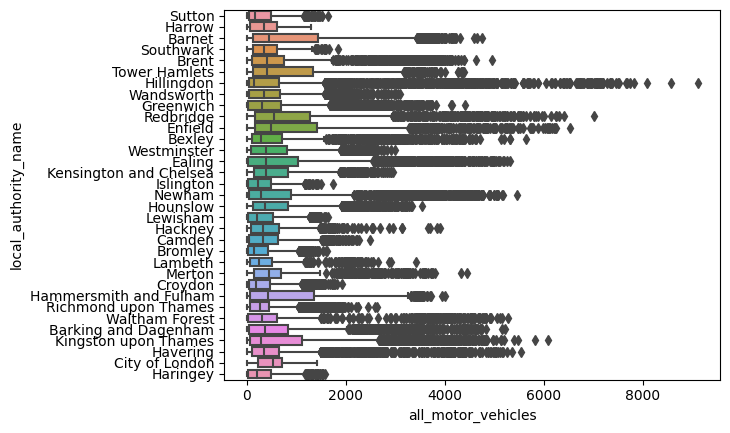

In [17]:
sns.boxplot(data=traffic,x='all_motor_vehicles' ,y='local_authority_name')
plt.show()

<Axes: xlabel='year', ylabel='Count'>

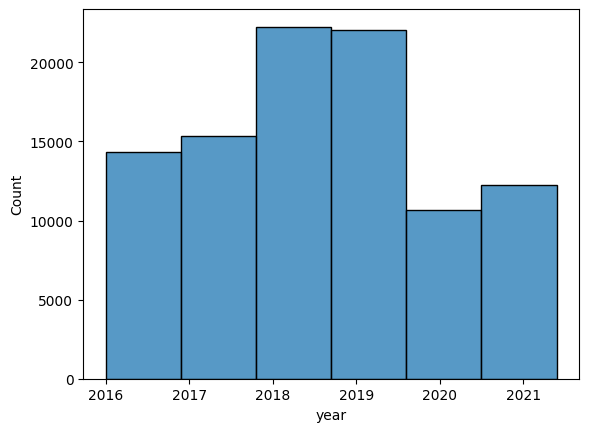

In [18]:
sns.histplot(data=traffic, x='year', binwidth=.9)

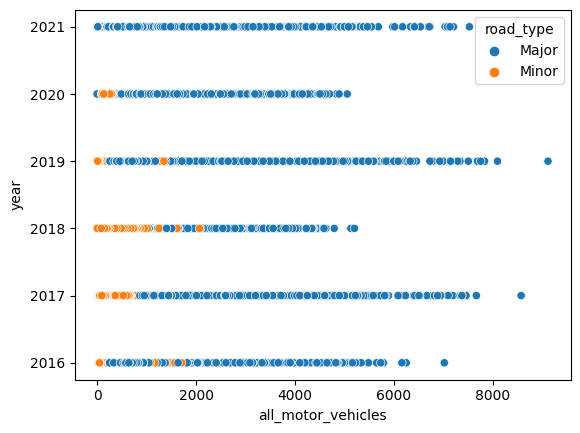

In [20]:
sns.scatterplot(data=traffic, x='all_motor_vehicles', y='year', hue='road_type', hue_order=['Major', 'Minor'])
plt.show()

In [58]:
# Find the 25th percentile
twenty_fifth = traffic['all_motor_vehicles'].quantile(0.25)

# Save the median
traffic_median = traffic['all_motor_vehicles'].median()

# Gather the 75th percentile
seventy_fifth = traffic['all_motor_vehicles'].quantile(0.75)
print(twenty_fifth, traffic_median, seventy_fifth)

50.0 260.0 546.0


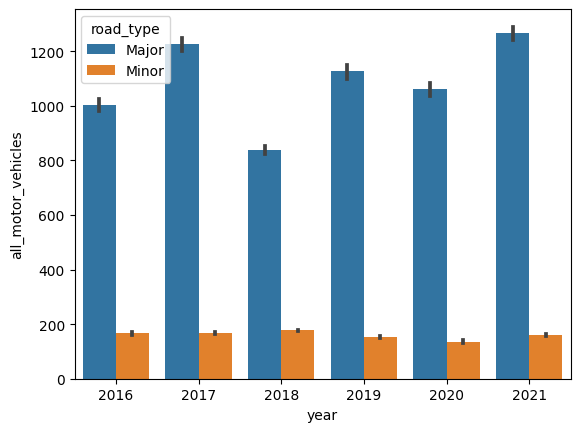

In [24]:
sns.barplot(data=traffic, x='year', y='all_motor_vehicles', hue='road_type', hue_order=['Major', 'Minor'])
plt.show()

In [27]:
traffic.describe()

,count_point_id,year,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
count,96852.000000,96852.000000,96852.000000,96852.000000,96852.000000,96852.000000,96852.000000,96852.000000,96852.000000,96852.000000,96852.000000,96852.000000,96852.000000,96852.000000,96852.000000
mean,498155.095279,2018.373560,15.460620,15.844206,422.465008,11.622827,104.920838,15.294222,2.144396,4.615868,0.810257,1.857793,4.042219,28.764754,583.617633
std,424289.550068,1.554484,50.301126,29.520606,603.423511,18.315760,171.736590,33.388528,4.913078,13.392426,2.345308,10.547307,22.610714,75.192364,841.414333
min,6000.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000
25%,38440.000000,2017.000000,1.000000,1.000000,48.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000
50%,803236.000000,2018.000000,3.000000,5.000000,229.000000,5.000000,45.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,315.000000
75%,942394.000000,2019.000000,11.000000,18.000000,492.000000,16.000000,114.000000,13.000000,2.000000,3.000000,1.000000,1.000000,1.000000,21.000000,675.000000
max,951769.000000,2021.000000,1833.000000,501.000000,6758.000000,321.000000,1850.000000,387.000000,104.000000,194.000000,46.000000,354.000000,563.000000,1220.000000,9110.000000


In [29]:
print(traffic['local_authority_name'].value_counts())

local_authority_name
Hillingdon                6048
Barnet                    5244
Croydon                   4848
Bromley                   4596
Hounslow                  3948
Lewisham                  3672
Westminster               3552
Havering                  3504
Ealing                    3348
Greenwich                 3276
Kingston upon Thames      3228
Enfield                   3216
Richmond upon Thames      3132
Bexley                    3072
Wandsworth                3036
Lambeth                   3024
Tower Hamlets             2988
Brent                     2940
Newham                    2568
Southwark                 2508
Haringey                  2472
Redbridge                 2472
Sutton                    2364
Waltham Forest            2280
Camden                    2244
Islington                 2040
Harrow                    2016
Hackney                   1884
Merton                    1848
Kensington and Chelsea    1752
Barking and Dagenham      1620
Hammersmith and Fu

In [31]:
print(traffic['all_motor_vehicles'].describe())

count    96852.000000
mean       583.617633
std        841.414333
min          0.000000
25%         62.000000
50%        315.000000
75%        675.000000
max       9110.000000
Name: all_motor_vehicles, dtype: float64


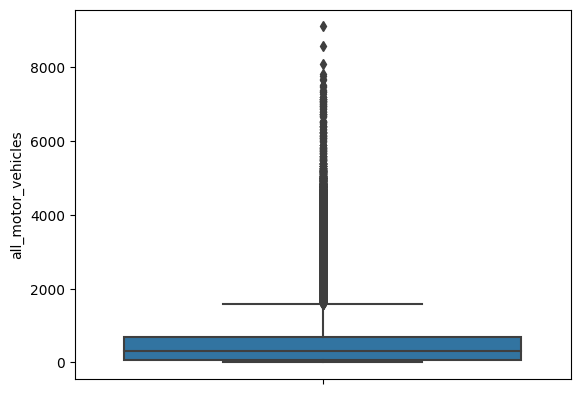

In [32]:
sns.boxplot(data=traffic, y='all_motor_vehicles')
plt.show()

In [33]:
#75th percentile
seventy_fifth = traffic['all_motor_vehicles'].quantile(0.75)

#25th percentile
twenty_fifth = traffic['all_motor_vehicles'].quantile(0.25)

#Interquantile range
vehicles_iqr = seventy_fifth - twenty_fifth

print(vehicles_iqr)

613.0


In [34]:
#calculate thresholds
upper = seventy_fifth + (1.5 * vehicles_iqr)
lower = twenty_fifth - (1.5 * vehicles_iqr)

#subset data
traffic = traffic[(traffic['all_motor_vehicles'] > lower) & (traffic['all_motor_vehicles'] < upper)]

print(traffic['all_motor_vehicles'].describe())

count    87753.000000
mean       355.277916
std        356.140271
min          0.000000
25%         50.000000
50%        260.000000
75%        546.000000
max       1594.000000
Name: all_motor_vehicles, dtype: float64


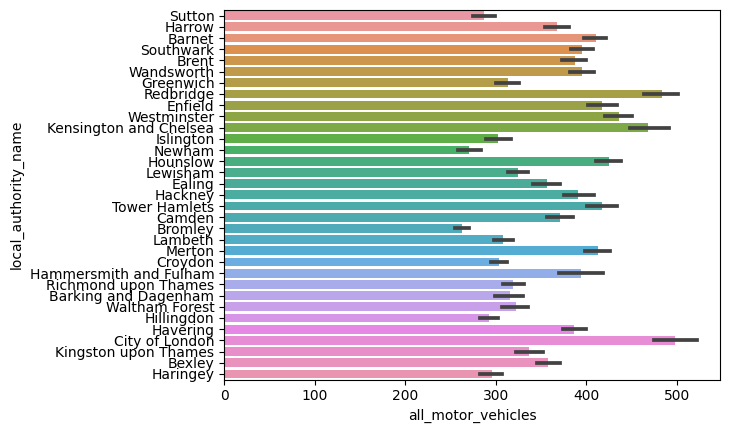

In [35]:
sns.barplot(data=traffic, x='all_motor_vehicles', y='local_authority_name')
plt.show()

In [36]:
#sampling and point estimates
traffic_sample = traffic.sample(n=1000)
print(traffic_sample)

        count_point_id direction_of_travel  year  count_date  \
381533           46681                   N  2021  15/06/2021   
346553          811194                   N  2019  19/06/2019   
309463          942772                   N  2016  08/06/2016   
314010          942650                   S  2016  10/10/2016   
339571           56914                   W  2019  21/05/2019   
...                ...                 ...   ...         ...   
355874          811204                   N  2019  18/06/2019   
108124          942672                   N  2017  19/05/2017   
346442          803062                   S  2018  05/06/2018   
381446           56186                   W  2021  24/03/2021   
370036           26900                   S  2020  27/04/2020   

          local_authority_name road_name road_type  pedal_cycles  \
381533                Havering      A125     Major             2   
346553  Kensington and Chelsea         U     Minor            24   
309463                Lewis

In [37]:
traffic_vehicles_mean = traffic['all_motor_vehicles'].mean()
traffic_sample_mean = traffic_sample['all_motor_vehicles'].mean()
print(traffic_vehicles_mean)
print(traffic_sample_mean)

355.2779164245097
350.863


In [38]:
traffic_sample = traffic.sample(n=100, random_state=2023)

In [39]:
sample_size = 100
vehicles_size = len(traffic)
print(vehicles_size)

87753


In [40]:
interval = vehicles_size // sample_size
print(interval)

877


In [41]:
traffic.iloc[::interval]

,count_point_id,direction_of_travel,year,count_date,local_authority_name,road_name,road_type,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
756,942927,E,2017,23/05/2017,Sutton,U,Minor,0,0,41,0,8,0,0,0,0,0,0.0,0.0,49.0
103717,36846,N,2017,01/11/2017,Merton,A236,Major,4,18,683,8,162,18,4,12,2,3,4.0,43.0,914.0
104774,46816,W,2017,19/09/2017,Bromley,A222,Major,1,7,427,7,68,7,4,8,3,2,1.0,25.0,534.0
107394,28108,W,2017,14/07/2017,Hounslow,A205,Major,10,22,1071,20,191,18,3,4,3,6,8.0,42.0,1346.0
108501,942765,N,2017,19/05/2017,Lewisham,C,Minor,3,3,116,2,23,2,0,2,0,0,0.0,4.0,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377360,56686,N,2020,21/07/2020,Hounslow,A312,Major,1,22,760,4,209,41,4,8,2,9,13.0,77.0,1072.0
378519,57079,S,2020,30/09/2020,Ealing,A4127,Major,5,20,399,6,100,56,9,23,0,5,21.0,114.0,639.0
379634,801405,W,2018,11/10/2018,Bromley,U,Minor,0,0,2,0,2,0,0,0,0,0,0.0,0.0,4.0
380640,57083,W,2021,30/04/2021,Brent,A4006,Major,8,8,432,11,92,15,4,0,0,0,1.0,20.0,563.0


<function matplotlib.pyplot.show(close=None, block=None)>

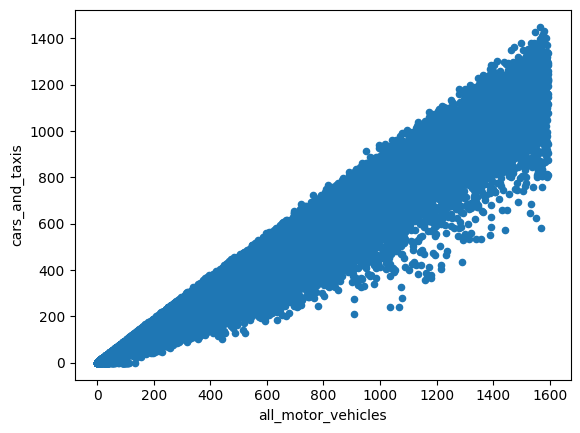

In [42]:
traffic_with_id = traffic.reset_index()
traffic_with_id.plot(x='all_motor_vehicles', y='cars_and_taxis', kind='scatter')
plt.show

In [44]:
traffic_focus = traffic_sample[['local_authority_name', 'road_type', 'all_motor_vehicles']]
traffic_focus = traffic_focus.reset_index()

In [45]:
traffic_resamp = traffic_focus.sample(frac=1, replace=True)

In [60]:
traffic_resamp['index'].value_counts()

index
333898    5
362086    4
328646    3
355693    3
337511    3
         ..
310168    1
108725    1
349088    1
358661    1
357884    1
Name: count, Length: 67, dtype: int64

In [47]:
num_unique_traffic = len(traffic_resamp.drop_duplicates(subset='index'))
print(num_unique_traffic)

67


In [48]:
len(traffic_sample) - num_unique_traffic

33

In [49]:
mean_traffic_sample = traffic['all_motor_vehicles'].mean()
print(mean_traffic_sample)

355.2779164245097


In [50]:
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(
        np.mean(traffic_sample.sample(frac=1, replace=True)['all_motor_vehicles'])
    )

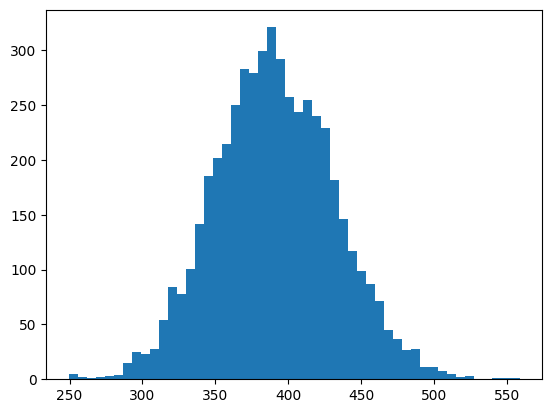

In [51]:
plt.hist(so_boot_distn, bins=50)
plt.show()

In [52]:
std_error = np.std(so_boot_distn, ddof=1)
print(std_error)

41.110242710113994


In [53]:
mean_traffic_hyp = 350

In [54]:
z_score = (mean_traffic_sample - mean_traffic_hyp) / std_error
print(z_score)

0.12838446276580232
